## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 34s 3us/step


Heres how the data looks

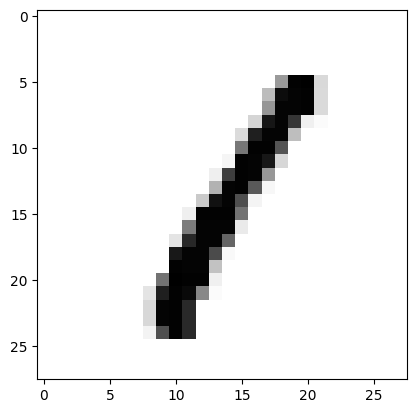

In [14]:
plt.imshow(x_train[3],cmap= 'Greys')

In [15]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

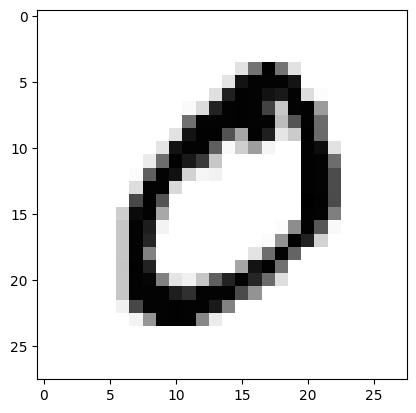

In [6]:
plt.imshow(x_train[1],cmap= 'Greys')

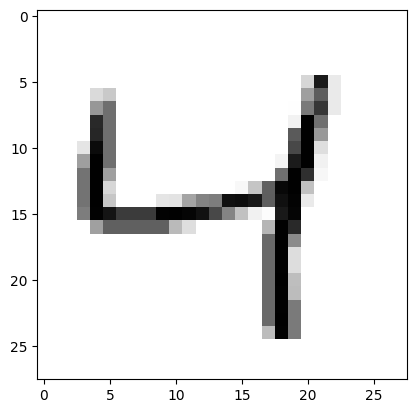

In [7]:
plt.imshow(x_train[2],cmap= 'Greys')

# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [8]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

c:\Users\shaas\tf_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8652 - loss: 0.4862 - val_accuracy: 0.9528 - val_loss: 0.1615
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9601 - loss: 0.1353 - val_accuracy: 0.9625 - val_loss: 0.1237
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9727 - loss: 0.0920 - val_accuracy: 0.9699 - val_loss: 0.1032
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0672 - val_accuracy: 0.9703 - val_loss: 0.1042
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9854 - loss: 0.0506 - val_accuracy: 0.9684 - val_loss: 0.0993
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.0998
Test accuracy: 0.9742000102996826


## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [10]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        #TODO

    def build(self, input_shape):
        #TODO
        pass

    def call(self, inputs):
        #TODO
        return inputs

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        #TODO

    def build(self, input_shape):
        #TODO
        pass

    def call(self, inputs):
        #TODO
        return inputs
    
class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        #TODO
        return inputs

In [11]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),initializer='random_normal',trainable=True)
        self.b = self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        z = tf.nn.softmax(z)
        return z

class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return tf.reshape(inputs, (tf.shape(inputs)[0], -1))



## Using out custom layers to Build a model for MNIST

In [12]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8552 - loss: 0.5404 - val_accuracy: 0.9500 - val_loss: 0.1730
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9561 - loss: 0.1470 - val_accuracy: 0.9645 - val_loss: 0.1211
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9732 - loss: 0.0940 - val_accuracy: 0.9718 - val_loss: 0.0992
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9789 - loss: 0.0686 - val_accuracy: 0.9655 - val_loss: 0.1120
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0521 - val_accuracy: 0.9728 - val_loss: 0.0882
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9730 - loss: 0.0888
Test accuracy: 0.9763000011444092


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





# Bonus Assignment 
* Try solving one more random dataset from kaggle/tensorflow datasets